In [110]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Model
from keras.layers import Layer
import matplotlib.pyplot as plt 

In [111]:
Image_Size=256
Batch_Size=32
Channels=3
EPOCHS=50

In [112]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("res",shuffle=True,image_size=(Image_Size,Image_Size),batch_size= Batch_Size)


Found 589 files belonging to 8 classes.


In [113]:
Class_Name=dataset.class_names
Class_Name

['Bajra', 'Mustard', 'Rice', 'Soyabean', 'Sugarcane', 'maize', 'ragi', 'wheat']

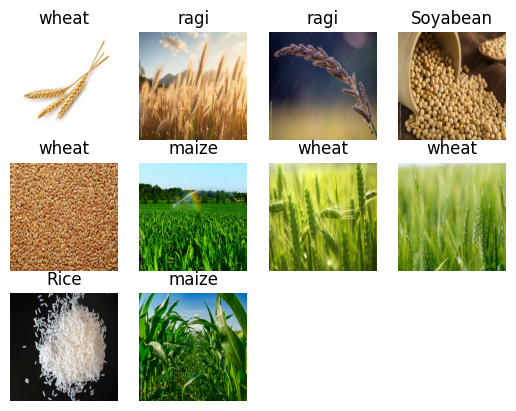

In [114]:
for image_b , label_b in dataset.take(1):
    for i in range(10):
            ax= plt.subplot(3,4,i+1)
            plt.imshow(image_b[i].numpy().astype("uint8"))
            plt.title(Class_Name[label_b[i]])
            plt.axis("off")

80%==>Training dataset
20%==>10% validation , 10% test

In [115]:
'''train_size=0.8
len(dataset)*train_size


train_ds=dataset.take(8)
len(train_ds)
'''

'train_size=0.8\nlen(dataset)*train_size\n\n\ntrain_ds=dataset.take(8)\nlen(train_ds)\n'

In [116]:
'''
trst_ds = dataset.skip(8)
len(trst_ds)

val_size=0.1
len(dataset)*val_size

'''

'\ntrst_ds = dataset.skip(8)\nlen(trst_ds)\n\nval_size=0.1\nlen(dataset)*val_size\n\n'

In [117]:
'''
val_ds=trst_ds.take(1)
len(val_ds)

test_ds=trst_ds.skip(1)
len(test_ds)'''

'\nval_ds=trst_ds.take(1)\nlen(val_ds)\n\ntest_ds=trst_ds.skip(1)\nlen(test_ds)'

In [118]:
def get_dataset_partition(ds,train_split=0.80,val_split=0.10,test_split=0.10,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
    
        train_ds=ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
    return train_ds , val_ds , test_ds

In [119]:
train_ds , val_ds , test_ds=get_dataset_partition(dataset)




In [120]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
'''resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])'''

'resize_and_rescale = tf.keras.Sequential([\n    tf.keras.layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),\n    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)\n])'

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [ ]:
input_shape=(Batch_Size,Image_Size,Image_Size,Channels)
n_classes=8
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
    
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


Epoch 1/50


9/9 [==============================] - 14s 1s/step - loss: 1.2992 - accuracy: 0.2720 - val_loss: 1.3062 - val_accuracy: 0.2500
Epoch 2/50
9/9 [==============================] - 8s 903ms/step - loss: 1.2823 - accuracy: 0.2835 - val_loss: 1.3008 - val_accuracy: 0.2500
Epoch 3/50
9/9 [==============================] - 8s 889ms/step - loss: 1.2687 - accuracy: 0.3065 - val_loss: 1.2868 - val_accuracy: 0.4375
Epoch 4/50
9/9 [==============================] - 8s 896ms/step - loss: 1.2631 - accuracy: 0.3563 - val_loss: 1.2858 - val_accuracy: 0.4688
Epoch 5/50
9/9 [==============================] - 8s 888ms/step - loss: 1.2006 - accuracy: 0.3946 - val_loss: 1.1301 - val_accuracy: 0.6562
Epoch 6/50
9/9 [==============================] - 9s 954ms/step - loss: 1.1892 - accuracy: 0.4444 - val_loss: 1.2695 - val_accuracy: 0.2812
Epoch 7/50
9/9 [==============================] - 8s 978ms/step - loss: 1.2325 - accuracy: 0.4674 - val_loss: 1.2595 - val_accuracy: 0.5000
Epoch 8/50
9/9 [====

In [ ]:
score = model.evaluate(test_ds)

2/2 [==============================] - 1s 282ms/step - loss: 0.2697 - accuracy: 0.8906


In [ ]:
score

[0.2697291672229767, 0.890625]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

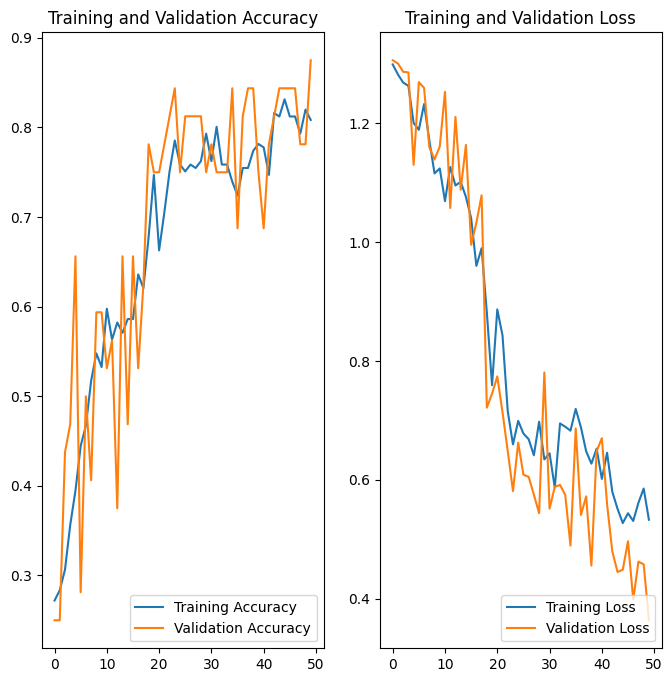

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")



plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")

Actual label: Sugarcane
1/1 [==============================] - 1s 666ms/step
Predicted label: Bajra


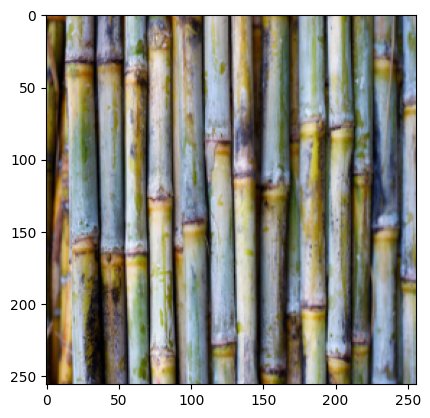

In [ ]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]

    plt.imshow(first_image)
    print("Actual label:",Class_Name[first_label])

    batch_prediction=model.predict(image_batch)
    print("Predicted label:",Class_Name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)

    predicted_class = Class_Name[np.argmax(prediction[0])]
    confidence = round(100 * np.max(prediction[0]), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 62ms/step


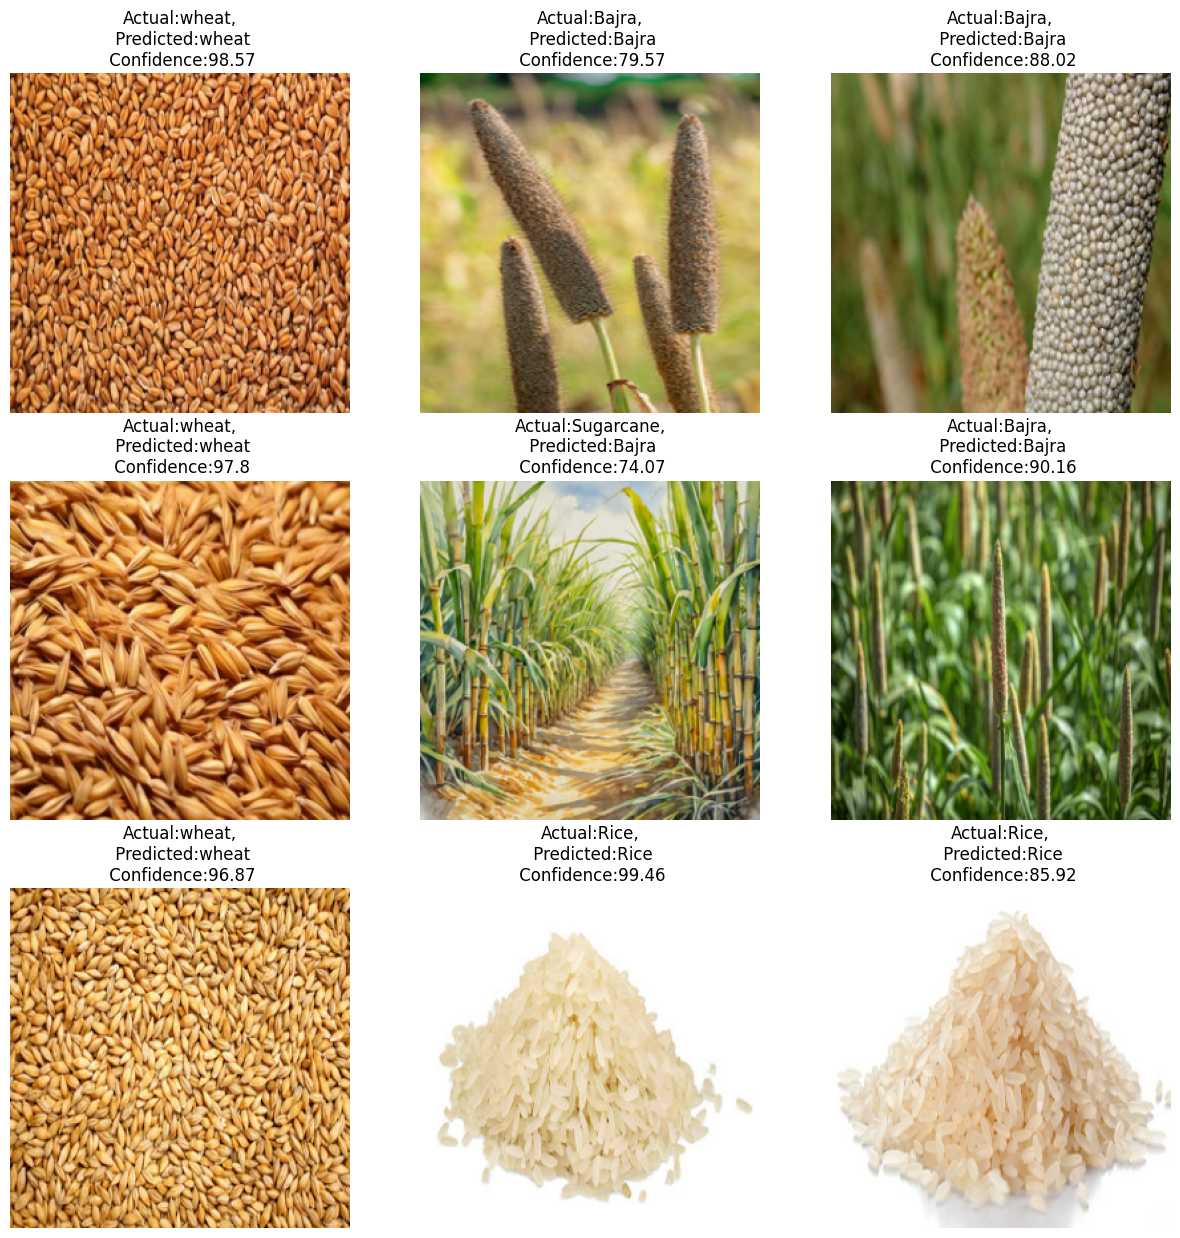

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = Class_Name[labels[i]]

        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}\n Confidence:{confidence}")
        plt.axis("off")


In [ ]:
'''import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")'''

'import os\nmodel_version=max([int(i) for i in os.listdir("../models")+[0]])+1\nmodel.save(f"../models/{model_version}")'